In [1]:
using JLD
using PGFPlots
using Interact
include("finite_horizon.jl")

solve (generic function with 1 method)

In [2]:
# Load data
policies = jldopen("param_sweep_full.jld", "r") do file
    read(file, "policies")
end
probs_set = Set([k[3] for k in keys(policies)])
probs_array = [a for a in probs_set];

In [3]:
# Function to generate policy plots
function plot_policies(eta::Float64, gamma::Float64, probs::Vector{Float64}, var::Float64, mu::Float64)
    # Extract policies
    πs = policies[[eta,gamma,probs, var, mu]]

    # Create figure
    g = GroupPlot(3, 3, groupStyle = "horizontal sep = 1.5cm, vertical sep = 1.5cm")

    # Plot probability distribution
    x = [-1, 0, 1, 2]
    p = Plots.Linear(x, probs, style="ybar,black,fill=blue,opacity=0.7", mark="none")
    a = Axis(p, xlabel=L"\Delta \beta", ylabel=L"P(\Delta \beta)", style="xtick={-1,0,1,2}, bar width=27pt",ymin=0)
    push!(g, a)

    # Plot policies
    for i = 1:5
        colormap = ColorMaps.Named("Jet")
        p = Plots.Image((x,y)->πs[i, round(UInt32, x), round(UInt32, y)], (1,50), (1,50), colormap = colormap, zmin=-1, zmax=maximum(πs))
        a = Axis(p, xlabel=L"\alpha", ylabel=L"\beta", title="t = $(i)")
        if i != 5
            a.plots[1].colorbar = false
        end
        push!(g, a)
    end
    g
end

plot_policies (generic function with 1 method)

## How do different parameters affect the policies?

Interact.Options{:SelectionSlider,Float64}(1: "input" = 0.75 Float64 ,"γ",0.75,"0.75",Interact.OptionDict(DataStructures.OrderedDict("0.5"=>0.5,"0.75"=>0.75,"1.0"=>1.0),Dict(0.5=>"0.5",0.75=>"0.75",1.0=>"1.0")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(3: "input-2" = 0.85 Float64 ,"η",0.85,"0.85",Interact.OptionDict(DataStructures.OrderedDict("0.75"=>0.75,"0.85"=>0.85,"0.95"=>0.95),Dict(0.95=>"0.95",0.85=>"0.85",0.75=>"0.75")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(5: "input-3" = 4 Int64 ,"i",4,"4",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7),Dict(7=>"7",4=>"4",2=>"2",3=>"3",5=>"5",6=>"6",1=>"1")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(7: "input-4" = 0.1 Float64 ,"var",0.1,"0.1",Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1,"1.0"=>1.0),Dict(0.1=>"0.1",1.0=>"1.0")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(9: "input-5" = 0.0 Float64 ,"μ",0.0,"0.0",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.5"=>0.5,"1.0"=>1.0),Dict(0.0=>"0.0",0.5=>"0.5",1.0=>"1.0")),Any[],Any[],true,"horizontal")

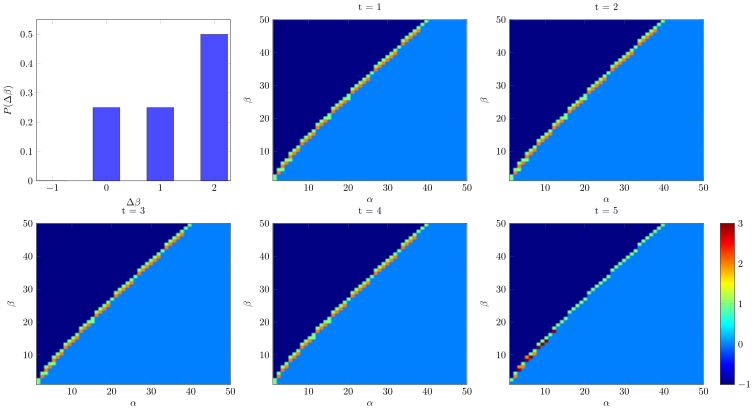

In [4]:
@manipulate for γ=0.5:0.25:1.0, η=0.75:0.1:0.95, i = 1:length(probs_array), var=[0.1, 1.0], μ = [0.0, 0.5, 1.0] 
    plot_policies(η, γ, probs_array[i], var, μ)
end

## What is the maximum hazardous event rate for which we would still release any vehicles?

In [5]:
function maximum_lambda(eta::Float64, gamma::Float64, probs::Vector{Float64}, mu::Float64, var::Float64)
    πs = policies[[eta,gamma,probs, var, mu]]

    # Create figure
    g = GroupPlot(3, 3, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.5cm")

    # Plot probability distribution
    x = [-1, 0, 1, 2]
    p = Plots.Linear(x, probs, style="ybar,black,fill=blue,opacity=0.7", mark="none")
    a = Axis(p, xlabel=L"\Delta \beta", ylabel=L"P(\Delta \beta)", style="xtick={-1,0,1,2}, bar width=27pt",ymin=0)
    push!(g, a)

    # Find MLE of lambda
    released = 1.0*(πs .!= 0.0)
    lambda = zeros(50, 50)
    for i = 1:50
        for j = 1:50
            lambda[i, j] = i/j
        end
    end
    

    # Plot lambda_max
    for i = 1:5
        # Indicator for whether vehicles were released
        βs = collect(1:50)
        λ_max = squeeze(maximum(released[i, :, :].*lambda, 1), 1)
        λ_min = squeeze(minimum((500*released[i, :, :]+1.0).*lambda, 1), 1)

        p1 = Plots.Linear(βs, λ_max)
        p2 = Plots.Linear(βs, λ_min)
        a = Axis(p1, xlabel=L"\beta", ylabel=L"$\hat \lambda_{\max}$", title="t = $(i)", xmin=0)
        push!(g, a)
    end
    g
end

maximum_lambda (generic function with 1 method)

Interact.Options{:SelectionSlider,Float64}(13: "input-6" = 0.75 Float64 ,"γ",0.75,"0.75",Interact.OptionDict(DataStructures.OrderedDict("0.5"=>0.5,"0.75"=>0.75,"1.0"=>1.0),Dict(0.5=>"0.5",0.75=>"0.75",1.0=>"1.0")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(15: "input-7" = 0.85 Float64 ,"η",0.85,"0.85",Interact.OptionDict(DataStructures.OrderedDict("0.75"=>0.75,"0.85"=>0.85,"0.95"=>0.95),Dict(0.95=>"0.95",0.85=>"0.85",0.75=>"0.75")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(17: "input-8" = 4 Int64 ,"i",4,"4",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7),Dict(7=>"7",4=>"4",2=>"2",3=>"3",5=>"5",6=>"6",1=>"1")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(19: "input-9" = 0.1 Float64 ,"var",0.1,"0.1",Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1,"1.0"=>1.0),Dict(0.1=>"0.1",1.0=>"1.0")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(21: "input-10" = 0.0 Float64 ,"μ",0.0,"0.0",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.5"=>0.5,"1.0"=>1.0),Dict(0.0=>"0.0",0.5=>"0.5",1.0=>"1.0")),Any[],Any[],true,"horizontal")

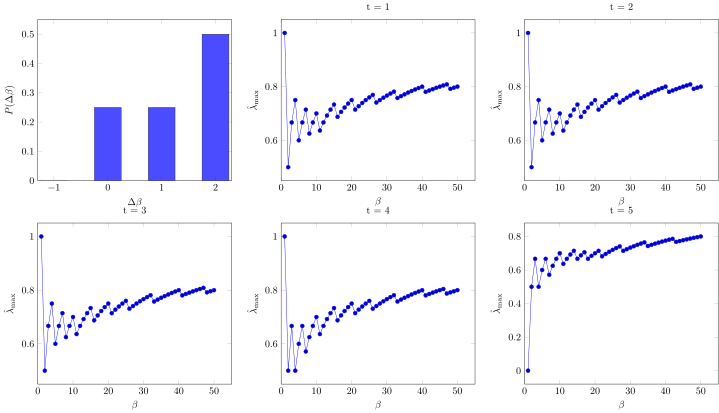

In [6]:
@manipulate for γ=0.5:0.25:1.0, η=0.75:0.1:0.95, i = 1:length(probs_array), var=[0.1, 1.0], μ = [0.0, 0.5, 1.0]  
    maximum_lambda(η, γ, probs_array[i], μ, var)
end

## In immediate reward model, what conditions are necessary for release when hazardous event rate $> \lambda_{\text{ref}}$?

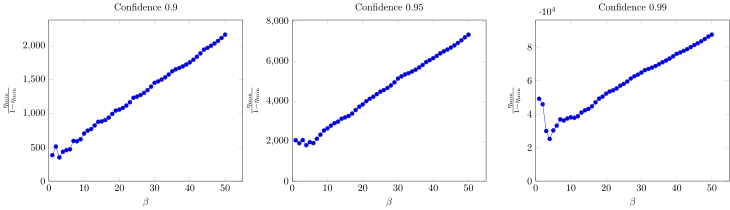

In [7]:
etas = zeros(3, 50)
C_refs = [0.9, 0.95, 0.99]
for i = 1:3
    def = ProblemDefinition(H = 5, eta=0.9, C_ref=C_refs[i], gamma = 0.9, β_distribution = [0.0, 1.0, 0.0, 0.0])
    for β = 1:50
        eta_min = 1.0
        α = β + 1
        s = State(α, β, 0)
        for n = 1:1000
            pn = P_n(s, n, def)
            eta = 1/(β/n/α*pn + 1)
            eta_min = min(eta_min, eta)
        end
        etas[i, β] = eta_min
    end
end

# Create figure
g = GroupPlot(3, 1, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.5cm")
for i = 1:3
    p = Plots.Linear(collect(1:50), etas[i, :]./(1.0 - etas[i, :]))
    a = Axis(p, xlabel=L"\beta", ylabel=L"$\frac{\eta_{\min}}{1 - \eta_{\min}}$", title="Confidence $(C_refs[i])", xmin=0, ymin=0)
    push!(g, a)
end
g

## How many vehicles should be released for different hazardous event rates?

In [8]:
function n_vs_lambda(eta::Float64, gamma::Float64, probs::Vector{Float64}, mu::Float64, var::Float64)
    πs = policies[[eta,gamma,probs,var,mu]]

    # Create figure
    g = GroupPlot(3, 3, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.75cm")

    # Plot probability distribution
    x = [-1, 0, 1, 2]
    p = Plots.Linear(x, probs, style="ybar,black,fill=blue,opacity=0.7", mark="none")
    a = Axis(p, xlabel=L"\Delta \beta", ylabel=L"P(\Delta \beta)", style="xtick={-1,0,1,2}, bar width=27pt",ymin=0)
    push!(g, a)

    # Find MLE of lambda
    released = 1.0*(πs .!= 0.0)
    lambda = zeros(50, 50)
    for i = 1:50
        for j = 1:50
            lambda[i, j] = i/j
        end
    end

    # Plot n as a function of lambda estimate
    for i = 1:5
        # Initialize and populate arrays
        λs = Array(Float64, 1)
        ns = Array(Float64, 1)
        βs = Array(Float64, 1)
        for j = 1:50
            for k = 1:50
                if πs[i, j, k] > 0
                    push!(λs, lambda[j, k])
                    push!(ns, πs[i, j, k])
                    push!(βs, k)
                end
            end
        end
        
        p1 = Plots.Scatter(λs[2:end], ns[2:end], βs[2:end])
        if i == 5
            a = Axis(p1, xlabel="Hazardous Event Rate", ylabel=L"n", title="t = $(i)", xmin=0, ymin=0, colorbar=true)
        else
            a = Axis(p1, xlabel="Hazardous Event Rate", ylabel=L"n", title="t = $(i)", xmin=0, ymin=0)
        end
        push!(g, a)
    end
    g
end

n_vs_lambda (generic function with 1 method)

Interact.Options{:SelectionSlider,Float64}(25: "input-11" = 0.75 Float64 ,"γ",0.75,"0.75",Interact.OptionDict(DataStructures.OrderedDict("0.5"=>0.5,"0.75"=>0.75,"1.0"=>1.0),Dict(0.5=>"0.5",0.75=>"0.75",1.0=>"1.0")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(27: "input-12" = 0.85 Float64 ,"η",0.85,"0.85",Interact.OptionDict(DataStructures.OrderedDict("0.75"=>0.75,"0.85"=>0.85,"0.95"=>0.95),Dict(0.95=>"0.95",0.85=>"0.85",0.75=>"0.75")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(29: "input-13" = 4 Int64 ,"i",4,"4",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7),Dict(7=>"7",4=>"4",2=>"2",3=>"3",5=>"5",6=>"6",1=>"1")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(31: "input-14" = 0.1 Float64 ,"var",0.1,"0.1",Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1,"1.0"=>1.0),Dict(0.1=>"0.1",1.0=>"1.0")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(33: "input-15" = 0.0 Float64 ,"μ",0.0,"0.0",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.5"=>0.5,"1.0"=>1.0),Dict(0.0=>"0.0",0.5=>"0.5",1.0=>"1.0")),Any[],Any[],true,"horizontal")

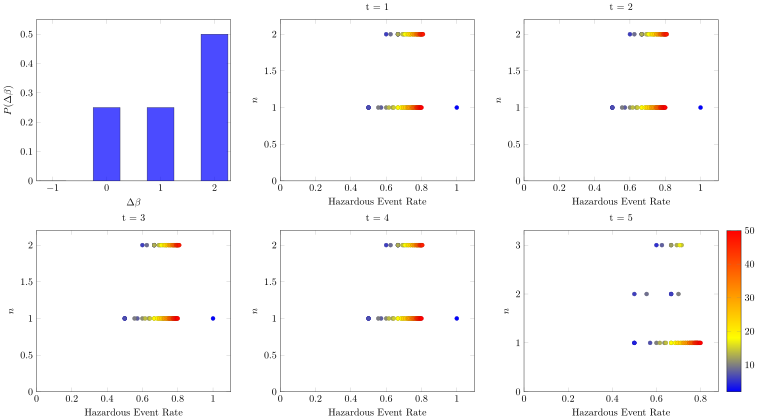

In [9]:
@manipulate for γ=0.5:0.25:1.0, η=0.75:0.1:0.95, i = 1:length(probs_array), var=[0.1, 1.0], μ = [0.0, 0.5, 1.0]  
    n_vs_lambda(η, γ, probs_array[i], μ, var)
end

## How does testing burden change with prior beliefs?

In [10]:
function experience_for_termination(mu::Float64, var::Float64, conf::Float64=0.95)
    # Create problem definition
    def = ProblemDefinition(H = 5, eta=0.95, C_ref=0.95, gamma = 1.0, β_distribution = zeros(4), μ = mu, var = var)
    
    # Loop through alpha and find minimum beta that provides terminal state
    min_beta = zeros(50)
    Δβ = mu/var
    Δα = mu*Δβ
    for α = 1:50
        β = 1
        while true
            s = State(α + Δα, β + Δβ, 0)
            if is_terminal(s, def)
                min_beta[α] = β
                break
            end
            β += 1
        end
    end
    min_beta
end

experience_for_termination (generic function with 2 methods)

In [ ]:
# Calculate minimum beta for termination as a function of alpha without any prior
beta_standard = experience_for_termination(0.0, 1.0)

# Create vector of means and variances
n = 30
means = [0.2, 0.5, 0.8, 0.9, 1.0, 1.1]
vars = logspace(-2.5, 1, n)

# Define group plot
g = GroupPlot(3, 2, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.75cm")

for m in means
    diffs = zeros(n)
    for i = 1:n
        beta_min = experience_for_termination(m, vars[i])
        diffs[i] = sum(beta_standard - beta_min)
    end

    p = Plots.Linear(vars, diffs)
    a = Axis(p, xlabel="Variance", ylabel="Change in terminal states", title="Mean = $(m)", xmode="log")
    push!(g, a)
end
g

In [ ]:
means = collect(0.01:0.01:1.2)
signs = zeros(length(means))
vars = logspace(-4, 1, 30)
confs = [0.9, 0.95, 0.99]

# Define threshold
thresh = 2

# Define group plot
g = GroupPlot(3, 1, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.75cm")

for c in confs
    for (i, m) in enumerate(means)
        diffs = zeros(n)
        for (j, v) in enumerate(vars)
            beta_min = experience_for_termination(m, v, c)
            diffs[j] = sum(beta_standard - beta_min)
        end
        if (maximum(diffs) > thresh) && (minimum(diffs) > -thresh)
            signs[i] = 1
        elseif (maximum(diffs) > thresh) && (minimum(diffs) < -thresh)
            signs[i] = 0
        else
            signs[i] = -1
        end
    end
    p = Plots.Linear(means, signs, mark="none", style="black, thick")
    a = Axis(p, xlabel=L"\mu", ylabel="Type", title="Confidence = $c", ymin=-1.2, ymax=1.2, xmin=0, xmax=1.2)
    push!(g, a)
end
g